In [46]:
# from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import os
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [47]:
cfz = pd.read_csv("dataframe_cfzlib.csv")
ref = pd.read_csv("dataframe_refzlib.csv")
pctdiff = pd.DataFrame({'pctdiff' : 1 - (cfz["time"] / ref["time"]), 'file_size': cfz['file_size']})
data = pd.concat([cfz, ref])

[Text(0, 0.5, 'Time (s)'),
 Text(0.5, 0, 'Gzipped input file size (Mb)'),
 Text(0.5, 1.0, 'Test: fslmaths in.nii.gz -add 0.0 out.nii.gz')]

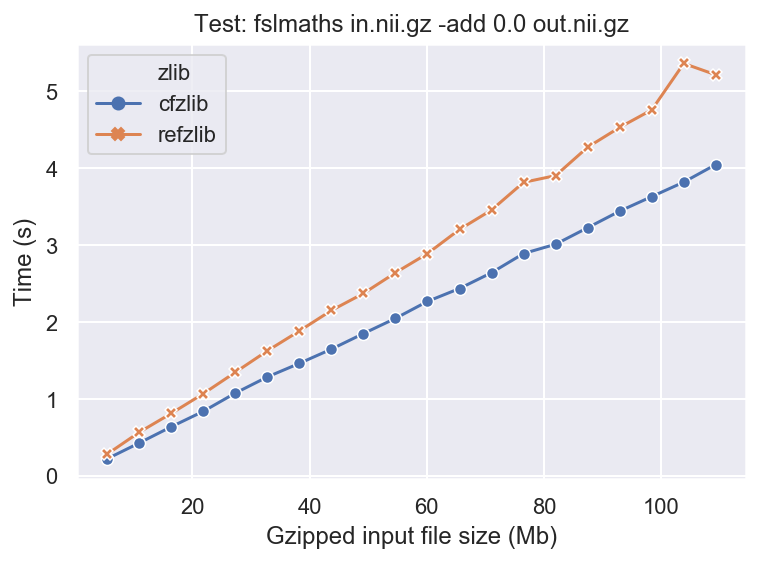

In [48]:
ax = sns.lineplot(x="file_size", y="time", hue="zlib", style="zlib", markers=True, dashes=False, data=data)
ax.set(xlabel='Gzipped input file size (Mb)', ylabel='Time (s)', title='Test: fslmaths in.nii.gz -add 0.0 out.nii.gz')

[Text(0, 0.5, 'Speed gain (%)'),
 Text(0.5, 0, 'Gzipped input file size (Mb)'),
 Text(0.5, 1.0, 'Speed gain (cloud flare faster than reference)')]

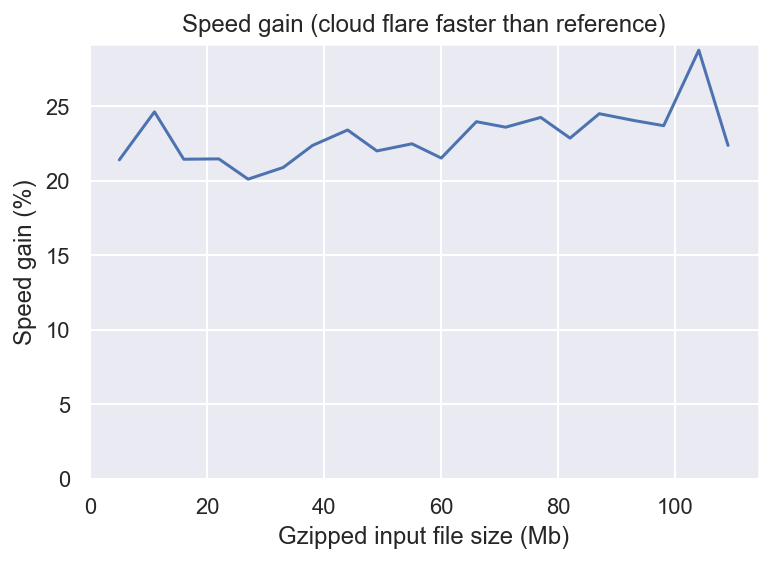

In [49]:
pctdiff['file_size'] = np.round(pctdiff['file_size'])
pctdiff['pctdiff'] = pctdiff['pctdiff']*100
ax2 = sns.lineplot(x="file_size", y="pctdiff", markers=True, dashes=False, data=pctdiff)
ax2.set_ylim(0,)
ax2.set(xlabel='Gzipped input file size (Mb)', ylabel='Speed gain (%)', title='Speed gain (cloud flare faster than reference)')

In [50]:
betdata = pd.DataFrame({'zlib': ['refzlib', 'cfzlib'], 'time': [16.201822996139526, 13.429291462898254]})

[Text(0, 0.5, 'Time (s)'),
 Text(0.5, 0, 'zlib version'),
 Text(0.5, 1.0, 'Test: bet in.nii.gz out.nii.gz -m -R')]

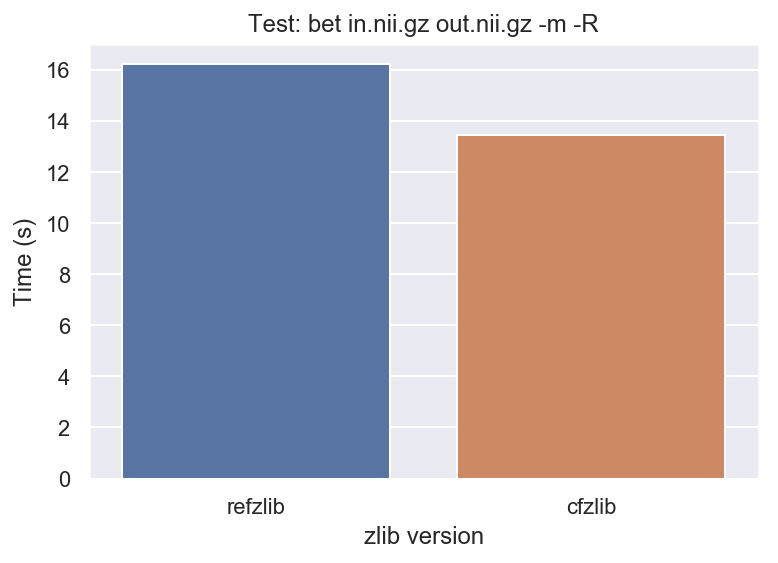

In [51]:
ax3 = sns.barplot(x="zlib", y="time", data=betdata)
ax3.set(xlabel='zlib version', ylabel='Time (s)', title='Test: bet in.nii.gz out.nii.gz -m -R')